In [1]:
import pandas as pd
import numpy as np

In [3]:
original_data=pd.read_csv("Data/adult.csv",
                          names=[
                              "Age","workclass","fnlwgt","Education","Education_num","marital_status",
                              "Occupation","Relationship","race","gender","capital gain","capital loss",
                              "hours per week","country","Target"],
                         sep=r'\s*,\s*',
                         engine='python',
                         na_values="?")
original_data.head()

,Age,workclass,fnlwgt,Education,Education_num,marital_status,Occupation,Relationship,race,gender,capital gain,capital loss,hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


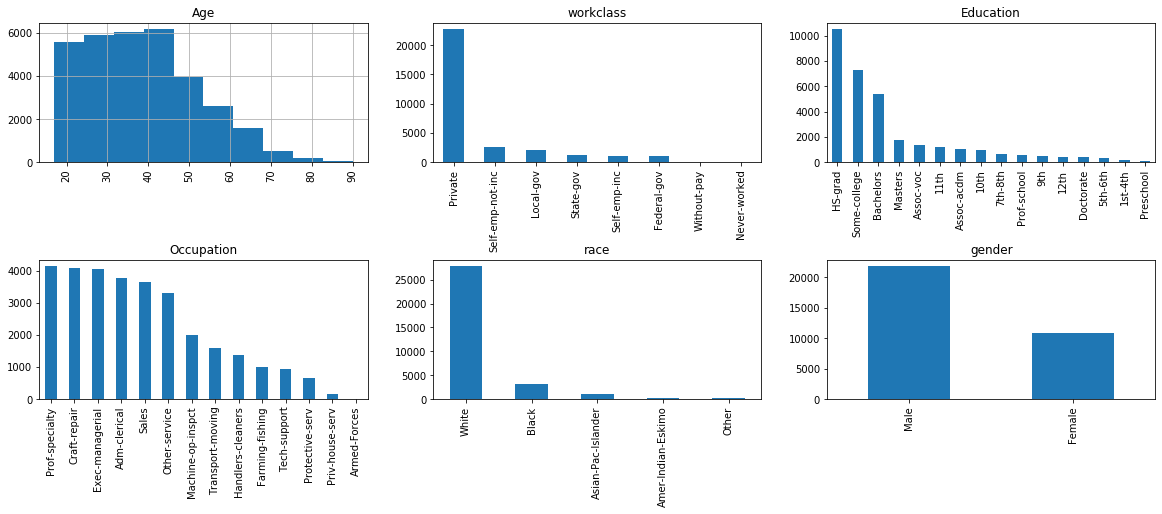

In [6]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i,column in enumerate(["Age","workclass","Education","Occupation","race","gender"]):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [8]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
original_data["Occupation"]=le.fit_transform(original_data["Occupation"].astype(str))
original_data.head()

,Age,workclass,fnlwgt,Education,Education_num,marital_status,Occupation,Relationship,race,gender,capital gain,capital loss,hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
original_data["Target"]=le.fit_transform(original_data["Target"].astype(str))
original_data.head()

,Age,workclass,fnlwgt,Education,Education_num,marital_status,Occupation,Relationship,race,gender,capital gain,capital loss,hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,0


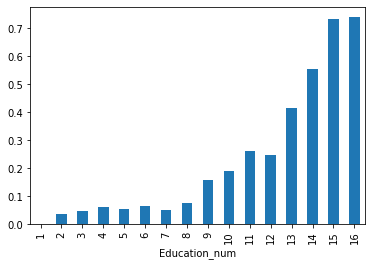

In [11]:
original_data.groupby("Education_num").Target.mean().plot(kind="Bar")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X=original_data[["Education_num","Occupation"]]
y=original_data["Target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)
score=classifier.score(X_test,y_test)
print(score)

/home/saikrishnan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7871948410870566


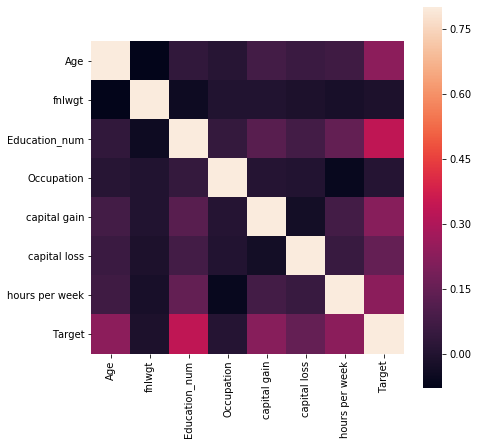

In [15]:
#Correlation matrix
import seaborn as sns
corrmat=original_data.corr()
f , ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax = .8, square=True);
plt.show()

In [16]:
original_data["race"]=le.fit_transform(original_data["race"].astype(str))
original_data["gender"]=le.fit_transform(original_data["gender"].astype(str))
original_data["marital_status"]=le.fit_transform(original_data["marital_status"].astype(str))
original_data["Education"]=le.fit_transform(original_data["Education"].astype(str))

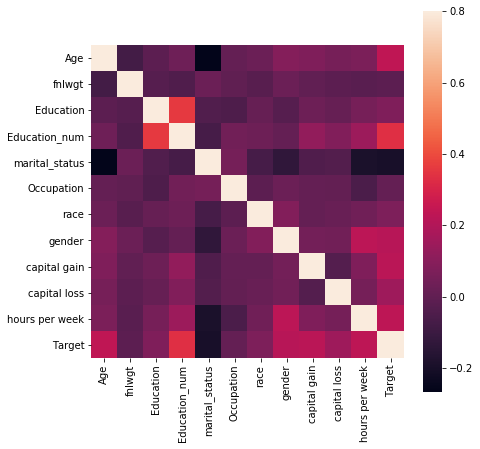

In [17]:
corrmat=original_data.corr()
f , ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax = .8, square=True);
plt.show()

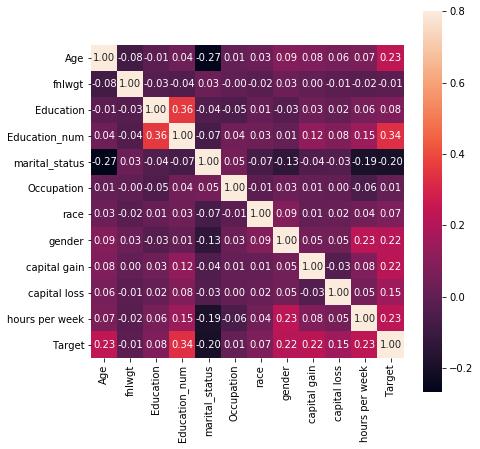

In [18]:
f , ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax = .8, square=True,annot=True, fmt='.2f');
plt.show()

In [22]:
x=original_data[["Education_num","Occupation","Age","gender"]]
y=original_data["Target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

/home/saikrishnan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.804544756640565


In [23]:
classifier=SVC(kernel='rbf',C=1.0)
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

/home/saikrishnan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.804544756640565


In [24]:
classifier=SVC(kernel='linear',C=1.0)
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.796714263780132
